<a href="https://colab.research.google.com/github/KirteshVerma/Hotel-booking-EDA-project/blob/main/Kirtesh_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!**

## **This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data.**

# **Explore and analyze the data to discover important factors that govern the bookings.**

In [1]:
# importing the required packages
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
# importing the data set

#mounting google drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/Dataset/Hotel Bookings.csv'
df = pd.read_csv(path)

In [4]:
df = df.copy() # copying the data set so our original dataset remains unchanged

In [5]:
# reading the dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [6]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,06-09-2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,07-09-2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,07-09-2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,07-09-2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,07-09-2017


In [ ]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

 Null values are the unknown values in the dataset. It necessary to remove null values as they can produce error in the visualisation process.

In [7]:
# df.isnull().sum()  #checking the null values
df.isnull().sum().sort_values(ascending=False)[:15]

company                      112593
agent                         16340
country                         488
children                          4
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
is_canceled                       0
market_segment                    0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
babies                            0
dtype: int64

In [8]:
df.drop(['company','agent'],axis = 1, inplace = True) # we are dropping the company and agent columns as they don't really affect our analysis

In [9]:
df = df.dropna(axis = 0) #  remove the null values of country and children columns as they can be consider as negligble

In [10]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

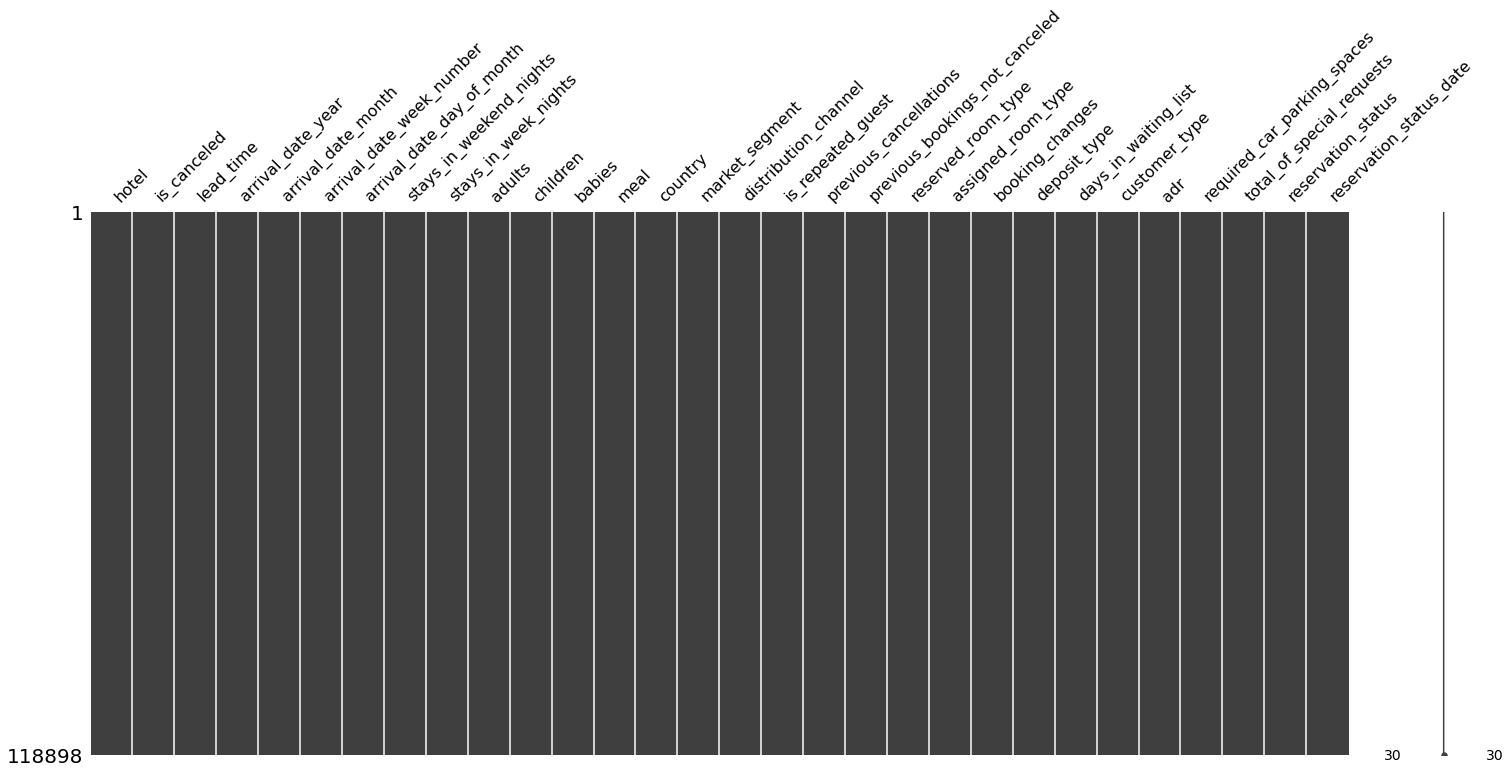

In [ ]:
msno.matrix(df)

Now our dataset is free of null values. We can now perform the visualization task without thinking about the error.

In [ ]:
df.describe() #Statistical aspect of the dataframe

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


There are only two types of hotels i.e. resort and city hotel. We will do the analysing between this two data.

**Lets begin with the data visualization part:**

## **Booking ratio of city and resort hotelt**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning:

Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.



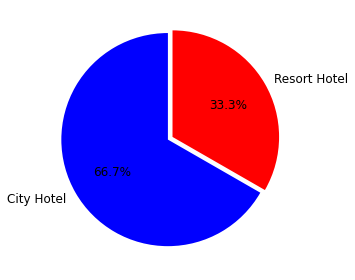

In [14]:
labels = df['hotel'].value_counts().index.tolist()  # LOOKING AT THE PERCENTAGE BOOKING OF CITY AND RESORT HOTEL and creating a pie chart
sizes = df['hotel'].value_counts().tolist() 
explode = (0,0.05) 
colors = ["B","R"] 

plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct="%.1f%%",startangle=90,textprops={'fontsize':12})
plt.tight_layout()
plt.show()


**The city hotel has higher percentage of bookings as compared ot resort hotel.More than 66% of bookings belong to City hotel**

## overview of cancellation of bookings

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



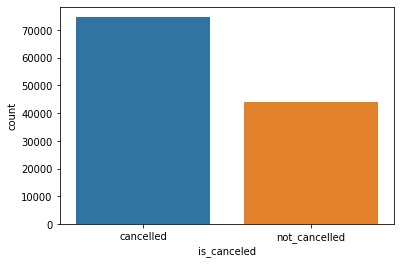

In [15]:
#Checking the overall bookings of both city and resort hotel.
df['is_canceled'] = df.is_canceled.replace([0,1], ['cancelled', 'not_cancelled'])
canceled_data = df['is_canceled']
sns.countplot(canceled_data)

**The cancelled bookings are greater in number than the bookings that are not cancelled. This concludes that the customers cancelled their bookings frequently.**

## Overview of the Arrival Period.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



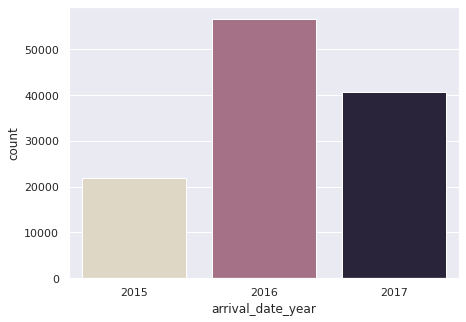

In [16]:
plt.figure(figsize=(7,5))    #Checking the yearly arrival rate of customers
sns.set_theme(style="darkgrid")
sns.countplot(df['arrival_date_year'],palette="ch:s=-.2,r=.6")
plt.show()

**Year 2016 has the highest number of bookings whereas year 2015 has least bookings. In year 2017 booings dropped as compared to 2016**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



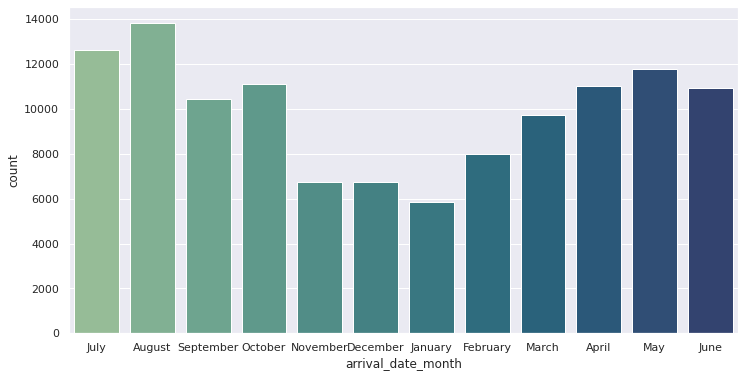

In [17]:
plt.figure(figsize=(12,6)) #checkinng the busisest months of year for hotel booking
sns.set_theme(style="darkgrid")
sns.countplot(df['arrival_date_month'],palette="crest")
plt.show()

**months of August and July has the maximum number of bookigs. 
months of November, december and January has the lowest nubmer of booings. Bookings start to increase from the month of February.**

## Market segment and Distribution channel

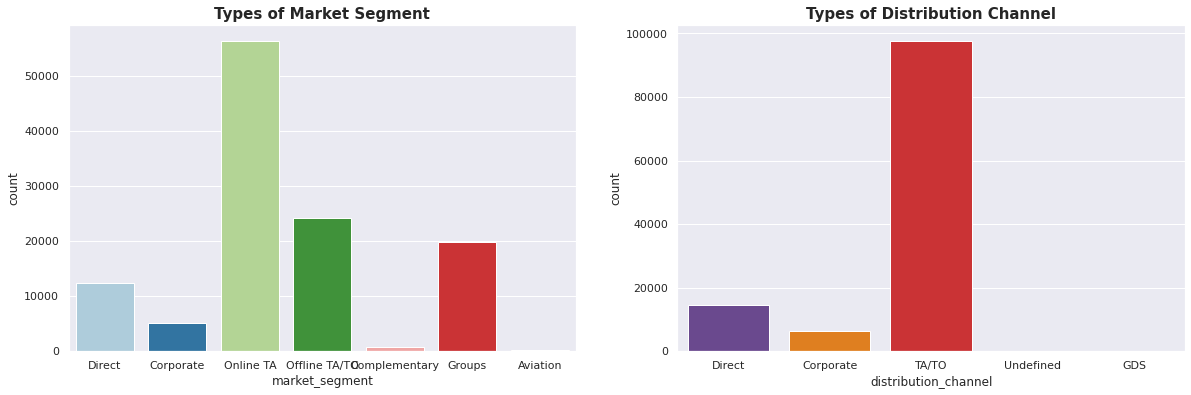

In [18]:
# TA = Travel Agent
# TA = Tour operator

plt.figure(figsize=(20,6))                                                         
plt.subplot(1,2,1)
sns.set_theme(style="darkgrid")
sns.countplot(x='market_segment',data=df,palette='Paired')
plt.title('Types of Market Segment',fontweight="bold",size=15)

plt.subplot(1,2,2)
sns.set_theme(style="darkgrid")
sns.countplot(data=df,x='distribution_channel',palette='Paired_r')
plt.title('Types of Distribution Channel',fontweight="bold",size=15)


plt.show()

**We can see that both market segment and distribution channel involves online or offline travel agencies. Number of bookings made my people through travel agent both online and offline is higher than rest of the segment.**

## Preffered meal type

Meal
Undefined/SC--->no meal package;

BB--->Bed & Breakfast

HB--->Halfboard(breakfast and one other meal---usually dinner);

FB--->fullboard(breakfast,lunch and dinner)

In [19]:
df.meal.value_counts(normalize=True)   

BB           0.772620
HB           0.121398
SC           0.089472
Undefined    0.009798
FB           0.006712
Name: meal, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



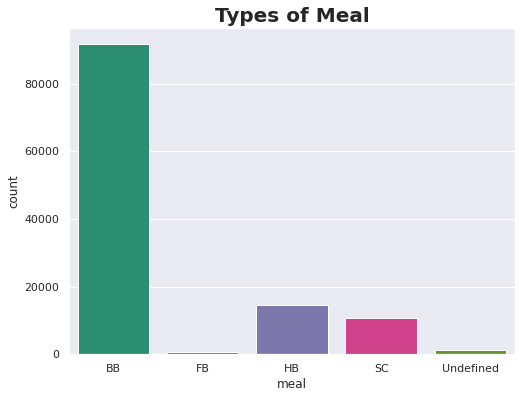

In [20]:
plt.figure(figsize=(8,6))
sns.countplot(df['meal'],palette='Dark2')
sns.set_theme(style="darkgrid",palette='Paired')
plt.title('Types of Meal',fontweight="bold",size=20)
plt.show()

**The highest percentage is of BB which is 77.26%.The BB is most preferred meal type of the customers.**

## Overview of the customer

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



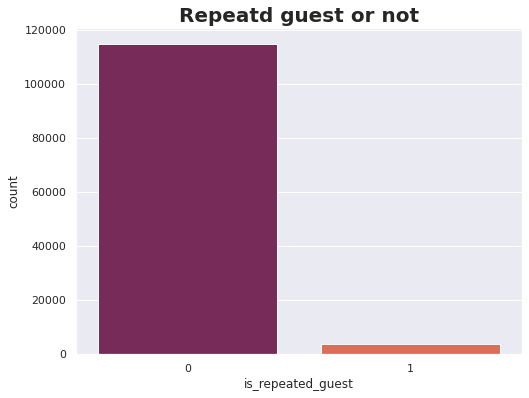

In [21]:
#to check whether the guest is repeated or not
plt.figure(figsize=(8,6))

sns.set_theme(style="darkgrid")
sns.countplot(df['is_repeated_guest'],palette="rocket")
plt.title('Repeatd guest or not',fontweight="bold",size=20)
plt.show()

In [22]:
df.is_repeated_guest.value_counts(normalize=True)

0    0.967989
1    0.032011
Name: is_repeated_guest, dtype: float64

**It's pretty clear from the graph that most of the customers fall under non-repeated guest category**

Customer types:

Contract--->when the booking has an allotment or other type of contract associated to it;

Group--->when the booking is associated to a group;

Transient--->when the booking is not part of a group or contract,and is not associated to other transient booking;

Transient-party--->when the booking is transient,but is associated to atleast other transient booking

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



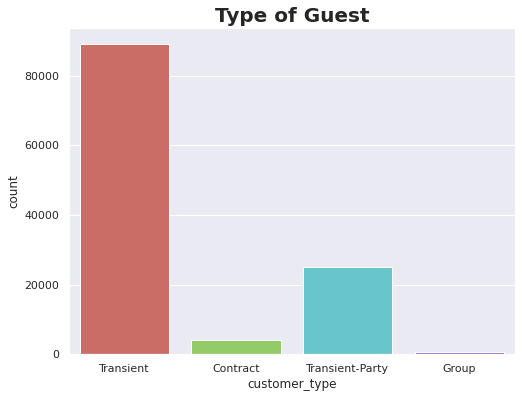

In [23]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")
sns.countplot(df['customer_type'],palette='hls')
plt.title('Type of Guest',fontweight="bold",size=20)

plt.show()

**Mojority of the booking are transient.This means that the booking is not part of a group or contact.With the ease of booking directly from the website,most people tend to skip the middleman to ensure quick response from their booking.**

## Deposit type

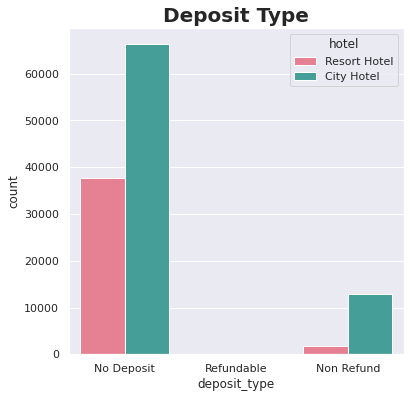

In [24]:
plt.figure(figsize=(6,6))
sns.set_theme(style="darkgrid")
sns.countplot(data= df,x='deposit_type',hue='hotel',palette="husl")
plt.title('Deposit Type',fontweight="bold",size=20)
plt.show()

**Majority of the Bookings does not require any type of deposit. This could be considered as one of the reason for high cancellation rate.**

## Total number of Special request

In [25]:
df.total_of_special_requests.value_counts(normalize=True) # this will tell us the total number of special request that has been made

0    0.588664
1    0.278567
2    0.108681
3    0.020917
4    0.002851
5    0.000320
Name: total_of_special_requests, dtype: float64

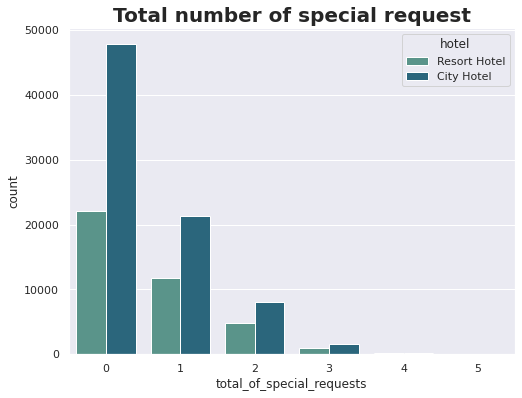

In [26]:
plt.figure(figsize=(8,6))
sns.set_theme(style="darkgrid")

sns.countplot(data= df,x='total_of_special_requests',hue='hotel',palette='crest')
plt.title('Total number of special request',fontweight="bold",size=20)
plt.show()



**The number of special request are very less in both resort hotel and city hotel. However the number of special request made in city hotel are higher than resort hotel. If the city hotel manages to fullfill the special request of the customers then they are more likely to book city hotel for the next time.**

## Stay on weekend night and weekday night

In [13]:
df.stays_in_weekend_nights.value_counts(normalize=True)  # overview of the data of stay on weekend night

0     0.434658
2     0.279643
1     0.256741
4     0.015551
3     0.010538
6     0.001287
5     0.000656
8     0.000505
7     0.000160
9     0.000093
10    0.000059
12    0.000042
16    0.000025
13    0.000025
14    0.000017
Name: stays_in_weekend_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



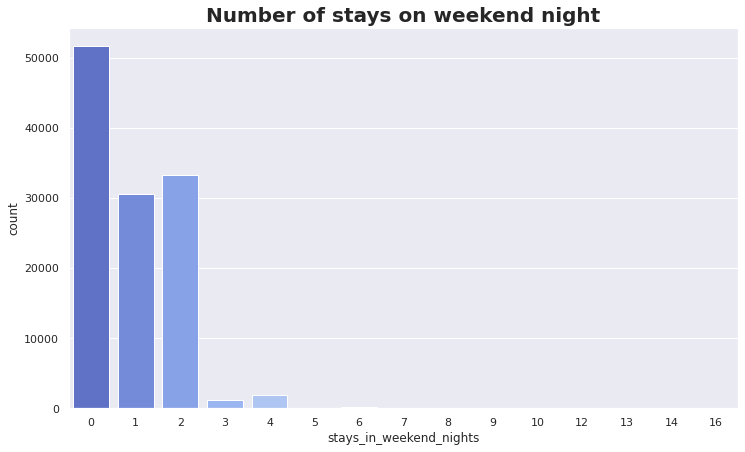

In [27]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['stays_in_weekend_nights'],palette='coolwarm')
plt.title('Number of stays on weekend night',fontweight="bold",size=20)
plt.show()

In [28]:
df.stays_in_week_nights.value_counts(normalize=True) # overview of the data of stay on weeknights

2     0.282376
1     0.253082
3     0.186740
5     0.092945
4     0.080355
0     0.063861
6     0.012540
10    0.008663
7     0.008638
8     0.005501
9     0.001943
15    0.000715
11    0.000463
19    0.000370
12    0.000353
20    0.000345
14    0.000294
13    0.000227
16    0.000135
21    0.000126
22    0.000059
18    0.000050
25    0.000050
30    0.000042
17    0.000034
24    0.000025
40    0.000017
26    0.000008
32    0.000008
33    0.000008
34    0.000008
35    0.000008
41    0.000008
Name: stays_in_week_nights, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



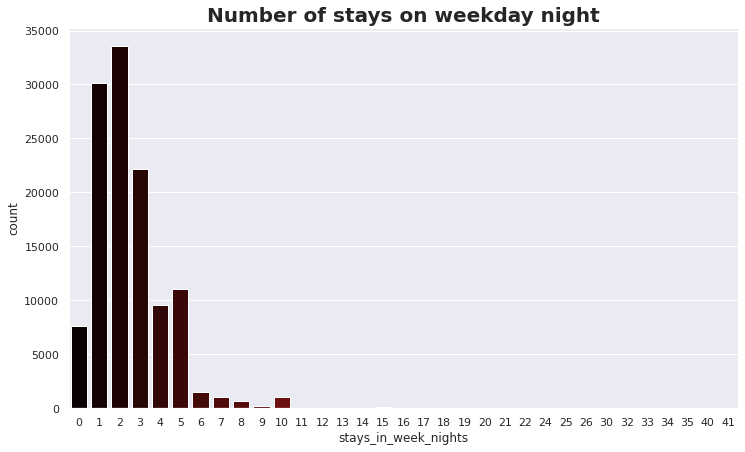

In [29]:
plt.figure(figsize=(12,7))
sns.set_theme(style="darkgrid")
sns.countplot(df['stays_in_week_nights'],palette='gist_heat')
plt.title('Number of stays on weekday night',fontweight="bold",size=20)
plt.show()

Number of stay on weekday night is higher than weekend night. The maximum stay on weekend night is 2 followed by 1. Where as the maximum stay on week night is 2 followed by 1,3 and 5.